In [106]:
from pycaret.datasets import get_data
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import mlflow

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
import nltk

from nltk.tokenize import word_tokenize
from gensim import corpora, models

from wordcloud import WordCloud


In [5]:
all_datasets = get_data('index')

,Dataset,Data Types,Default Task,Target Variable 1,Target Variable 2,# Instances,# Attributes,Missing Values
0,anomaly,Multivariate,Anomaly Detection,None,None,1000,10,N
1,france,Multivariate,Association Rule Mining,InvoiceNo,Description,8557,8,N
2,germany,Multivariate,Association Rule Mining,InvoiceNo,Description,9495,8,N
3,bank,Multivariate,Classification (Binary),deposit,None,45211,17,N
4,blood,Multivariate,Classification (Binary),Class,None,748,5,N
5,cancer,Multivariate,Classification (Binary),Class,None,683,10,N
6,credit,Multivariate,Classification (Binary),default,None,24000,24,N
7,diabetes,Multivariate,Classification (Binary),Class variable,None,768,9,N
8,electrical_grid,Multivariate,Classification (Binary),stabf,None,10000,14,N
9,employee,Multivariate,Classification (Binary),left,None,14999,10,N


In [34]:
df = get_data('wikipedia')

,Title,Category,Text
0,Apple Inc.,Information Technology,nasdaq 100 component s p 500 component founda...
1,than the previous version and minor positionin...,NaN,NaN
2,the life and times of macintosh the computer ...,NaN,NaN
3,Adobe Systems,Information Technology,br nasdaq 100 nasdaq 100 component br s p 500...
4,General Motors,Consumer Discretionary,s p 500 s p 500 component industry automotive...


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Title     500 non-null    object
 1   Category  466 non-null    object
 2   Text      466 non-null    object
dtypes: object(3)
memory usage: 11.8+ KB


In [8]:
df[df['Text'].isna()]

,Title,Category,Text
1,than the previous version and minor positionin...,NaN,NaN
2,the life and times of macintosh the computer ...,NaN,NaN
5,like pontiac oldsmobile saturn hummer and ser...,NaN,NaN
8,softail and fxstsb bad boy softail models tha...,NaN,NaN
10,aring to bow down to a caucasian male inside o...,NaN,NaN
12,e announced in 2009 that it was planning to dr...,NaN,NaN
15,existing whistleblower lawsuit filed by paul f...,NaN,NaN
19,ths of home confinement five years of probatio...,NaN,NaN
28,ing compulsory licenses for the patents on the...,NaN,NaN
30,each section of color the word southwest appe...,NaN,NaN


In [35]:
df = df.dropna(subset = ['Category'])

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 466 entries, 0 to 499
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Title     466 non-null    object
 1   Category  466 non-null    object
 2   Text      466 non-null    object
dtypes: object(3)
memory usage: 14.6+ KB


In [49]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [36]:
df['text'] = df['Title'] + ' ' + df['Text']
df = df.drop(['Title', 'Text'], axis = 1)

df['text'] = df['text'].str.lower()

df['text'] = df['text'].apply(lambda x: ''.join([char for char in x if char not in string.punctuation]))
df['text'] = df['text'].apply(lambda x: ''.join([char for char in x if ord(char) < 128]))

# Remove stopwords
stop_words = set(stopwords.words('english'))
df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))

# Lemmatization
lemmatizer = WordNetLemmatizer()
df['text'] = df['text'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))

df.head()

,Category,text
0,Information Technology,apple inc nasdaq 100 component p 500 component...
3,Information Technology,adobe system br nasdaq 100 nasdaq 100 componen...
4,Consumer Discretionary,general motor p 500 p 500 component industry a...
6,Energy,general electric p 500 p 500 component industr...
7,Consumer Discretionary,harleydavidson br p 500 p 500 component founda...


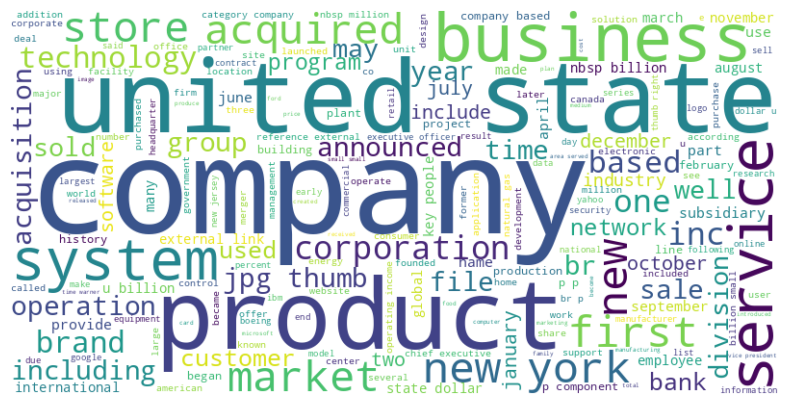

In [29]:
wordcloud = WordCloud(width = 800, height = 400, background_color = 'white').generate(' '.join(df['text']))

plt.figure(figsize = (10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [37]:
# TF-IDF embedding
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df['text'])

# Get feature names (words) from TF-IDF vectorizer
feature_names = tfidf_vectorizer.get_feature_names_out()

# Select top 1000 features based on TF-IDF scores
top_1000_features_indices = tfidf_matrix.sum(axis = 0).argsort()[:, -1000 :].tolist()[0]
top_1000_feature_names = [feature_names[idx] for idx in top_1000_features_indices]

# Create DataFrame with top 1000 TF-IDF features
df_bow_tfidf = pd.DataFrame(tfidf_matrix[:, top_1000_features_indices].toarray(), columns = [f'bow_tfidf_{word}' for word in top_1000_feature_names])
df = pd.concat([df, df_bow_tfidf], axis = 1)

df.head()

,Category,text,bow_tfidf_party,bow_tfidf_autozone,bow_tfidf_cummins,bow_tfidf_qualcomm,bow_tfidf_akamai,bow_tfidf_provided,bow_tfidf_alcoa,bow_tfidf_ea,...,bow_tfidf_united,bow_tfidf_http,bow_tfidf_small,bow_tfidf_new,bow_tfidf_product,bow_tfidf_bank,bow_tfidf_com,bow_tfidf_service,bow_tfidf_state,bow_tfidf_company
0,Information Technology,apple inc nasdaq 100 component p 500 component...,0.006253,0.0,0.0,0.0,0.0,0.002964,0.0,0.0,...,0.006536,0.000000,0.003522,0.026271,0.027002,0.000000,0.000000,0.014280,0.006439,0.039228
3,Information Technology,adobe system br nasdaq 100 nasdaq 100 componen...,0.003232,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.016217,0.005704,0.001820,0.045263,0.008374,0.006388,0.002791,0.021323,0.019969,0.081105
4,Consumer Discretionary,general motor p 500 p 500 component industry a...,0.000000,0.0,0.0,0.0,0.0,0.003720,0.0,0.0,...,0.004102,0.000866,0.006631,0.013740,0.002542,0.000000,0.000847,0.000996,0.004849,0.023081
6,Energy,general electric p 500 p 500 component industr...,0.000000,0.0,0.0,0.0,0.0,0.009318,0.0,0.0,...,0.008221,0.001446,0.005536,0.035182,0.033960,0.000000,0.004245,0.028270,0.009448,0.077088
7,Consumer Discretionary,harleydavidson br p 500 p 500 component founda...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.009296,0.024525,0.037564,0.000000,0.028802,0.000000,0.024002,0.000000,0.009158,0.056663


In [38]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['Category'] = encoder.fit_transform(df['Category'])

df = df.drop(['text'], axis = 1)

df.head()

,Category,bow_tfidf_party,bow_tfidf_autozone,bow_tfidf_cummins,bow_tfidf_qualcomm,bow_tfidf_akamai,bow_tfidf_provided,bow_tfidf_alcoa,bow_tfidf_ea,bow_tfidf_training,...,bow_tfidf_united,bow_tfidf_http,bow_tfidf_small,bow_tfidf_new,bow_tfidf_product,bow_tfidf_bank,bow_tfidf_com,bow_tfidf_service,bow_tfidf_state,bow_tfidf_company
0,6,0.006253,0.0,0.0,0.0,0.0,0.002964,0.0,0.0,0.0,...,0.006536,0.000000,0.003522,0.026271,0.027002,0.000000,0.000000,0.014280,0.006439,0.039228
3,6,0.003232,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.016217,0.005704,0.001820,0.045263,0.008374,0.006388,0.002791,0.021323,0.019969,0.081105
4,0,0.000000,0.0,0.0,0.0,0.0,0.003720,0.0,0.0,0.0,...,0.004102,0.000866,0.006631,0.013740,0.002542,0.000000,0.000847,0.000996,0.004849,0.023081
6,2,0.000000,0.0,0.0,0.0,0.0,0.009318,0.0,0.0,0.0,...,0.008221,0.001446,0.005536,0.035182,0.033960,0.000000,0.004245,0.028270,0.009448,0.077088
7,0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.009296,0.024525,0.037564,0.000000,0.028802,0.000000,0.024002,0.000000,0.009158,0.056663


In [39]:
mlflow.autolog()

2024/03/02 17:03:51 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2024/03/02 17:03:52 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.


In [40]:
from pycaret.classification import *

s = setup(df, target = 'Category', session_id = 1212,
           log_experiment = True, experiment_name = 'wikipedia_0')

,Description,Value
0,Session id,1212
1,Target,Category
2,Target type,Multiclass
3,Original data shape,"(498, 1001)"
4,Transformed data shape,"(498, 1001)"
5,Transformed train set shape,"(348, 1001)"
6,Transformed test set shape,"(150, 1001)"
7,Numeric features,1000
8,Rows with missing values,6.4%
9,Preprocess,True


2024/03/02 17:04:11 INFO mlflow.tracking.fluent: Experiment with name 'wikipedia_0' does not exist. Creating a new experiment.


In [41]:
model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dummy,Dummy Classifier,0.1582,0.2000,0.1582,0.0252,0.0435,0.0000,0.0000,0.1590
rf,Random Forest Classifier,0.1580,0.2013,0.1580,0.1502,0.1284,0.0203,0.0227,0.5250
lr,Logistic Regression,0.1496,0.2077,0.1496,0.0565,0.0707,-0.0058,-0.0114,1.0500
nb,Naive Bayes,0.1496,0.2113,0.1496,0.1256,0.1300,0.0324,0.0329,0.1160
et,Extra Trees Classifier,0.1495,0.2122,0.1495,0.1231,0.1200,0.0134,0.0140,0.4090
lda,Linear Discriminant Analysis,0.1467,0.2015,0.1467,0.1406,0.1304,0.0469,0.0484,0.2600
dt,Decision Tree Classifier,0.1385,0.2100,0.1385,0.1406,0.1323,0.0290,0.0293,0.1970
ada,Ada Boost Classifier,0.1350,0.1844,0.1350,0.0444,0.0626,-0.0063,-0.0161,0.8310
lightgbm,Light Gradient Boosting Machine,0.1323,0.2017,0.1323,0.1287,0.1195,0.0085,0.0083,17.0200
xgboost,Extreme Gradient Boosting,0.1296,0.2087,0.1296,0.1226,0.1171,0.0109,0.0106,9.3070


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [42]:
df = get_data('wikipedia')
df = df.dropna(subset = ['Category'])

df['text'] = df['Title'] + ' ' + df['Text']
df = df.drop(['Title', 'Text'], axis = 1)

df['text'] = df['text'].str.lower()

df['text'] = df['text'].apply(lambda x: ''.join([char for char in x if char not in string.punctuation]))
df['text'] = df['text'].apply(lambda x: ''.join([char for char in x if ord(char) < 128]))

stop_words = set(stopwords.words('english'))
df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))

lemmatizer = WordNetLemmatizer()
df['text'] = df['text'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df['text'])

feature_names = tfidf_vectorizer.get_feature_names_out()

top_250_features_indices = tfidf_matrix.sum(axis = 0).argsort()[:, -250 :].tolist()[0]
top_250_feature_names = [feature_names[idx] for idx in top_250_features_indices]

df_bow_tfidf = pd.DataFrame(tfidf_matrix[:, top_250_features_indices].toarray(), columns = [f'bow_tfidf_{word}' for word in top_250_feature_names])
df = pd.concat([df, df_bow_tfidf], axis = 1)

df.head()

,Title,Category,Text
0,Apple Inc.,Information Technology,nasdaq 100 component s p 500 component founda...
1,than the previous version and minor positionin...,NaN,NaN
2,the life and times of macintosh the computer ...,NaN,NaN
3,Adobe Systems,Information Technology,br nasdaq 100 nasdaq 100 component br s p 500...
4,General Motors,Consumer Discretionary,s p 500 s p 500 component industry automotive...


,Category,text,bow_tfidf_laboratory,bow_tfidf_founder,bow_tfidf_mill,bow_tfidf_former,bow_tfidf_game,bow_tfidf_september,bow_tfidf_march,bow_tfidf_digital,...,bow_tfidf_united,bow_tfidf_http,bow_tfidf_small,bow_tfidf_new,bow_tfidf_product,bow_tfidf_bank,bow_tfidf_com,bow_tfidf_service,bow_tfidf_state,bow_tfidf_company
0,Information Technology,apple inc nasdaq 100 component p 500 component...,0.000000,0.003957,0.000000,0.002293,0.000000,0.006641,0.013108,0.031019,...,0.006536,0.000000,0.003522,0.026271,0.027002,0.000000,0.000000,0.014280,0.006439,0.039228
3,Information Technology,adobe system br nasdaq 100 nasdaq 100 componen...,0.008015,0.002045,0.004243,0.000000,0.000000,0.006865,0.009034,0.003207,...,0.016217,0.005704,0.001820,0.045263,0.008374,0.006388,0.002791,0.021323,0.019969,0.081105
4,Consumer Discretionary,general motor p 500 p 500 component industry a...,0.000000,0.004967,0.000000,0.000000,0.000000,0.004168,0.000000,0.000000,...,0.004102,0.000866,0.006631,0.013740,0.002542,0.000000,0.000847,0.000996,0.004849,0.023081
6,Energy,general electric p 500 p 500 component industr...,0.000000,0.002074,0.000000,0.000000,0.027949,0.006961,0.013738,0.009753,...,0.008221,0.001446,0.005536,0.035182,0.033960,0.000000,0.004245,0.028270,0.009448,0.077088
7,Consumer Discretionary,harleydavidson br p 500 p 500 component founda...,0.000000,0.007035,0.000000,0.000000,0.081271,0.000000,0.000000,0.000000,...,0.009296,0.024525,0.037564,0.000000,0.028802,0.000000,0.024002,0.000000,0.009158,0.056663


In [44]:
df = df.dropna(subset = ['Category'])

s = setup(df, target = 'Category', session_id = 1212,
           log_experiment = True, experiment_name = 'wikipedia_1')

,Description,Value
0,Session id,1212
1,Target,Category
2,Target type,Multiclass
3,Target mapping,"Consumer Discretionary: 0, Consumer Staples: 1, Energy: 2, Financials: 3, Health Care: 4, Industrials: 5, Information Technology: 6, Materials: 7, Telecommunications Services: 8, Utilities: 9"
4,Original data shape,"(466, 252)"
5,Transformed data shape,"(466, 252)"
6,Transformed train set shape,"(326, 252)"
7,Transformed test set shape,"(140, 252)"
8,Numeric features,250
9,Categorical features,1


2024/03/02 17:16:14 INFO mlflow.tracking.fluent: Experiment with name 'wikipedia_1' does not exist. Creating a new experiment.


In [45]:
model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.1688,0.0000,0.1688,0.0288,0.0491,0.0000,0.0000,0.3070
ada,Ada Boost Classifier,0.1688,0.0000,0.1688,0.0288,0.0491,0.0000,0.0000,0.4690
xgboost,Extreme Gradient Boosting,0.1688,0.0000,0.1688,0.0288,0.0491,0.0000,0.0000,1.2240
dummy,Dummy Classifier,0.1688,0.0000,0.1688,0.0288,0.0491,0.0000,0.0000,0.1650
et,Extra Trees Classifier,0.1350,0.0000,0.1350,0.0998,0.0916,-0.0184,-0.0217,0.3560
ridge,Ridge Classifier,0.1322,0.0000,0.1322,0.0743,0.0817,-0.0252,-0.0298,0.1770
rf,Random Forest Classifier,0.1230,0.0000,0.1230,0.0872,0.0916,-0.0208,-0.0219,0.5300
qda,Quadratic Discriminant Analysis,0.1230,0.0000,0.1230,0.0584,0.0597,0.0028,-0.0008,0.2250
svm,SVM - Linear Kernel,0.1196,0.0000,0.1196,0.0307,0.0357,-0.0004,-0.0122,0.2190
nb,Naive Bayes,0.1104,0.0000,0.1104,0.0124,0.0223,0.0000,0.0000,0.2060


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [53]:
df = get_data('wikipedia')
df = df.dropna(subset = ['Category'])

df['text'] = df['Title'] + ' ' + df['Text']
df = df.drop(['Title', 'Text'], axis = 1)

df['text'] = df['text'].str.lower()

df['text'] = df['text'].apply(lambda x: ''.join([char for char in x if char not in string.punctuation]))
df['text'] = df['text'].apply(lambda x: ''.join([char for char in x if ord(char) < 128]))

stop_words = set(stopwords.words('english'))
df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))

lemmatizer = WordNetLemmatizer()
df['text'] = df['text'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))

,Title,Category,Text
0,Apple Inc.,Information Technology,nasdaq 100 component s p 500 component founda...
1,than the previous version and minor positionin...,NaN,NaN
2,the life and times of macintosh the computer ...,NaN,NaN
3,Adobe Systems,Information Technology,br nasdaq 100 nasdaq 100 component br s p 500...
4,General Motors,Consumer Discretionary,s p 500 s p 500 component industry automotive...


In [54]:
df['tokens'] = df['text'].apply(lambda x: word_tokenize(x))
stop_words = set(stopwords.words('english'))
df['tokens'] = df['tokens'].apply(lambda x: [word for word in x if word.lower() not in stop_words])

dictionary = corpora.Dictionary(df['tokens'])
corpus = [dictionary.doc2bow(text) for text in df['tokens']]

lda_model = models.LdaModel(corpus, num_topics = 20, id2word = dictionary, passes = 15)

df['topics'] = df['tokens'].apply(lambda x: lda_model[dictionary.doc2bow(x)])

for i in range(20):
    df[f'topic_{i + 1}'] = df['topics'].apply(lambda x: next((prob for topic, prob in x if topic == i), 0.0))

df.drop(['tokens', 'topics', 'text'], axis = 1, inplace = True)

In [55]:
df.head()

,Category,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,...,topic_11,topic_12,topic_13,topic_14,topic_15,topic_16,topic_17,topic_18,topic_19,topic_20
0,Information Technology,0.450442,0.0,0.0,0.549312,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.0
3,Information Technology,0.000000,0.0,0.0,0.999673,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.0
4,Consumer Discretionary,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.948578,0.0,0.0,0.0,0.0,0.0,0.05119,0.000000,0.000000,0.0
6,Energy,0.000000,0.0,0.0,0.678107,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.272817,0.0
7,Consumer Discretionary,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.998531,0.000000,0.0


In [56]:
df = df.dropna(subset = ['Category'])

s = setup(df, target = 'Category', session_id = 1212,
           log_experiment = True, experiment_name = 'wikipedia_3')

,Description,Value
0,Session id,1212
1,Target,Category
2,Target type,Multiclass
3,Target mapping,"Consumer Discretionary: 0, Consumer Staples: 1, Energy: 2, Financials: 3, Health Care: 4, Industrials: 5, Information Technology: 6, Materials: 7, Telecommunications Services: 8, Utilities: 9"
4,Original data shape,"(466, 21)"
5,Transformed data shape,"(466, 21)"
6,Transformed train set shape,"(326, 21)"
7,Transformed test set shape,"(140, 21)"
8,Numeric features,20
9,Preprocess,True


2024/03/02 17:25:19 INFO mlflow.tracking.fluent: Experiment with name 'wikipedia_3' does not exist. Creating a new experiment.


In [57]:
model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.3895,0.0000,0.3895,0.3702,0.3650,0.3023,0.3080,0.2810
gbc,Gradient Boosting Classifier,0.3840,0.0000,0.3840,0.3774,0.3645,0.2936,0.2995,1.2030
ridge,Ridge Classifier,0.3837,0.0000,0.3837,0.3365,0.3285,0.2800,0.2998,0.0470
lr,Logistic Regression,0.3835,0.0000,0.3835,0.3261,0.3247,0.2776,0.2975,0.9680
xgboost,Extreme Gradient Boosting,0.3806,0.0000,0.3806,0.3554,0.3522,0.2905,0.2967,0.2720
lda,Linear Discriminant Analysis,0.3655,0.0000,0.3655,0.3712,0.3430,0.2809,0.2897,0.0470
et,Extra Trees Classifier,0.3593,0.0000,0.3593,0.3642,0.3413,0.2692,0.2744,0.2030
lightgbm,Light Gradient Boosting Machine,0.3588,0.0000,0.3588,0.3451,0.3360,0.2664,0.2724,0.9280
knn,K Neighbors Classifier,0.3533,0.0000,0.3533,0.3298,0.3246,0.2518,0.2587,0.0550
dt,Decision Tree Classifier,0.3438,0.0000,0.3438,0.3409,0.3218,0.2497,0.2570,0.0500


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [61]:
df = get_data('wikipedia')
df = df.dropna(subset = ['Category'])

df['text'] = df['Title'] + ' ' + df['Text']
df = df.drop(['Title', 'Text'], axis = 1)

df['text'] = df['text'].str.lower()

df['text'] = df['text'].apply(lambda x: ''.join([char for char in x if char not in string.punctuation]))
df['text'] = df['text'].apply(lambda x: ''.join([char for char in x if ord(char) < 128]))

stop_words = set(stopwords.words('english'))
df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))

lemmatizer = WordNetLemmatizer()
df['text'] = df['text'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))

df['tokens'] = df['text'].apply(lambda x: word_tokenize(x))
stop_words = set(stopwords.words('english'))
df['tokens'] = df['tokens'].apply(lambda x: [word for word in x if word.lower() not in stop_words])

dictionary = corpora.Dictionary(df['tokens'])
corpus = [dictionary.doc2bow(text) for text in df['tokens']]

lda_model = models.LdaModel(corpus, num_topics = 50, id2word = dictionary, passes = 15)

df['topics'] = df['tokens'].apply(lambda x: lda_model[dictionary.doc2bow(x)])

for i in range(50):
    df[f'topic_{i + 1}'] = df['topics'].apply(lambda x: next((prob for topic, prob in x if topic == i), 0.0))

df.drop(['tokens', 'topics', 'text'], axis = 1, inplace = True)

df.head()

,Title,Category,Text
0,Apple Inc.,Information Technology,nasdaq 100 component s p 500 component founda...
1,than the previous version and minor positionin...,NaN,NaN
2,the life and times of macintosh the computer ...,NaN,NaN
3,Adobe Systems,Information Technology,br nasdaq 100 nasdaq 100 component br s p 500...
4,General Motors,Consumer Discretionary,s p 500 s p 500 component industry automotive...


,Category,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,...,topic_41,topic_42,topic_43,topic_44,topic_45,topic_46,topic_47,topic_48,topic_49,topic_50
0,Information Technology,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.033727,0.0,0.0,0.0,0.0,0.00000,0.0
3,Information Technology,0.000000,0.0,0.0,0.0,0.217428,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.03431,0.0
4,Consumer Discretionary,0.000000,0.0,0.0,0.0,0.024396,0.0,0.0,0.0,0.0,...,0.000000,0.754929,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0
6,Energy,0.090648,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0
7,Consumer Discretionary,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.999739,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0


In [62]:
df = df.dropna(subset = ['Category'])

s = setup(df, target = 'Category', session_id = 1212,
           log_experiment = True, experiment_name = 'wikipedia_4')

,Description,Value
0,Session id,1212
1,Target,Category
2,Target type,Multiclass
3,Target mapping,"Consumer Discretionary: 0, Consumer Staples: 1, Energy: 2, Financials: 3, Health Care: 4, Industrials: 5, Information Technology: 6, Materials: 7, Telecommunications Services: 8, Utilities: 9"
4,Original data shape,"(466, 51)"
5,Transformed data shape,"(466, 51)"
6,Transformed train set shape,"(326, 51)"
7,Transformed test set shape,"(140, 51)"
8,Numeric features,50
9,Preprocess,True


In [63]:
model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.5278,0.0000,0.5278,0.5156,0.4996,0.4583,0.4657,0.2430
gbc,Gradient Boosting Classifier,0.5155,0.0000,0.5155,0.5071,0.4919,0.4456,0.4511,1.3580
et,Extra Trees Classifier,0.5099,0.0000,0.5099,0.5086,0.4841,0.4394,0.4459,0.2440
xgboost,Extreme Gradient Boosting,0.4972,0.0000,0.4972,0.5052,0.4853,0.4259,0.4304,0.3770
svm,SVM - Linear Kernel,0.4517,0.0000,0.4517,0.4673,0.4280,0.3724,0.3841,0.1300
lightgbm,Light Gradient Boosting Machine,0.4449,0.0000,0.4449,0.4250,0.4175,0.3651,0.3706,0.8160
dt,Decision Tree Classifier,0.4418,0.0000,0.4418,0.4511,0.4285,0.3631,0.3690,0.0620
ridge,Ridge Classifier,0.4270,0.0000,0.4270,0.3961,0.3969,0.3411,0.3474,0.0590
lda,Linear Discriminant Analysis,0.4180,0.0000,0.4180,0.4433,0.4096,0.3387,0.3434,0.0510
lr,Logistic Regression,0.3869,0.0000,0.3869,0.3531,0.3493,0.2882,0.2965,0.0620


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [148]:
df = get_data('wikipedia')
df = df.dropna(subset = ['Category'])
df['Category'] = encoder.fit_transform(df['Category'])

df['text'] = df['Title'] + ' ' + df['Text']
df = df.drop(['Title', 'Text'], axis = 1)

df['text'] = df['text'].str.lower()

df['text'] = df['text'].apply(lambda x: ''.join([char for char in x if char not in string.punctuation]))
df['text'] = df['text'].apply(lambda x: ''.join([char for char in x if ord(char) < 128]))

stop_words = set(stopwords.words('english'))
df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))

lemmatizer = WordNetLemmatizer()
df['text'] = df['text'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))

df.head()

,Title,Category,Text
0,Apple Inc.,Information Technology,nasdaq 100 component s p 500 component founda...
1,than the previous version and minor positionin...,NaN,NaN
2,the life and times of macintosh the computer ...,NaN,NaN
3,Adobe Systems,Information Technology,br nasdaq 100 nasdaq 100 component br s p 500...
4,General Motors,Consumer Discretionary,s p 500 s p 500 component industry automotive...


,Category,text
0,6,apple inc nasdaq 100 component p 500 component...
3,6,adobe system br nasdaq 100 nasdaq 100 componen...
4,0,general motor p 500 p 500 component industry a...
6,2,general electric p 500 p 500 component industr...
7,0,harleydavidson br p 500 p 500 component founda...


In [149]:
df['tokens'] = df['text'].apply(lambda x: word_tokenize(x))
stop_words = set(stopwords.words('english'))
df['tokens'] = df['tokens'].apply(lambda x: [word for word in x if word.lower() not in stop_words])

dictionary = corpora.Dictionary(df['tokens'])
corpus = [dictionary.doc2bow(text) for text in df['tokens']]

num_topics = 50

lda_model = models.LdaModel(corpus, num_topics = num_topics, id2word = dictionary, passes = 20)

df['topics'] = df['tokens'].apply(lambda x: lda_model[dictionary.doc2bow(x)])

for i in range(num_topics):
    df[f'topic_{i + 1}'] = df['topics'].apply(lambda x: next((prob for topic, prob in x if topic == i), 0.0))

df.drop(['tokens', 'topics', 'text'], axis = 1, inplace = True)

df.head()

,Category,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,...,topic_41,topic_42,topic_43,topic_44,topic_45,topic_46,topic_47,topic_48,topic_49,topic_50
0,6,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.00000,0.0,0.032319,0.0,0.0,0.0,0.0,0.000000,0.0
3,6,0.000000,0.0,0.0,0.0,0.204492,0.0,0.0,0.0,0.0,...,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.042286,0.0
4,0,0.000000,0.0,0.0,0.0,0.023363,0.0,0.0,0.0,0.0,...,0.000000,0.74598,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
6,2,0.095934,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
7,0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.999739,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0


In [150]:
df['Category'].value_counts()

3    78
0    76
6    59
5    59
4    52
2    44
1    35
7    30
9    28
8     5
Name: Category, dtype: int64

In [151]:
from sklearn.utils import resample

target_count = 44

resampled_df = pd.DataFrame()

for category in df['Category'].unique():
    category_subset = df[df['Category'] == category]

    if len(category_subset) < target_count:
        resampled_category = resample(category_subset, replace = True, n_samples = target_count)
    else:
        resampled_category = category_subset.sample(target_count)

    resampled_df = pd.concat([resampled_df, resampled_category])

resampled_df['Category'].value_counts()

6    44
0    44
2    44
3    44
1    44
5    44
4    44
7    44
9    44
8    44
Name: Category, dtype: int64

In [160]:
resampled_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 440 entries, 22 to 393
Data columns (total 51 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  440 non-null    int64  
 1   topic_1   440 non-null    float64
 2   topic_2   440 non-null    float64
 3   topic_3   440 non-null    float64
 4   topic_4   440 non-null    float64
 5   topic_5   440 non-null    float64
 6   topic_6   440 non-null    float64
 7   topic_7   440 non-null    float64
 8   topic_8   440 non-null    float64
 9   topic_9   440 non-null    float64
 10  topic_10  440 non-null    float64
 11  topic_11  440 non-null    float64
 12  topic_12  440 non-null    float64
 13  topic_13  440 non-null    float64
 14  topic_14  440 non-null    float64
 15  topic_15  440 non-null    float64
 16  topic_16  440 non-null    float64
 17  topic_17  440 non-null    float64
 18  topic_18  440 non-null    float64
 19  topic_19  440 non-null    float64
 20  topic_20  440 non-null    float

In [152]:
resampled_df = resampled_df.dropna(subset = ['Category'])

s = setup(resampled_df, target = 'Category', session_id = 1212, index = False,
           log_experiment = True, experiment_name = 'wikipedia_5')

,Description,Value
0,Session id,1212
1,Target,Category
2,Target type,Multiclass
3,Original data shape,"(996, 51)"
4,Transformed data shape,"(996, 51)"
5,Transformed train set shape,"(697, 51)"
6,Transformed test set shape,"(299, 51)"
7,Numeric features,50
8,Preprocess,True
9,Imputation type,simple


In [153]:
model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8823,0.9879,0.8823,0.8903,0.8741,0.8472,0.8491,0.4110
et,Extra Trees Classifier,0.8709,0.9858,0.8709,0.8827,0.8644,0.8326,0.8346,0.3610
gbc,Gradient Boosting Classifier,0.8681,0.9800,0.8681,0.8682,0.8571,0.8289,0.8309,1.6870
xgboost,Extreme Gradient Boosting,0.8679,0.9866,0.8679,0.8778,0.8616,0.8290,0.8304,0.3180
lightgbm,Light Gradient Boosting Machine,0.8608,0.9813,0.8608,0.8712,0.8560,0.8203,0.8225,1.1850
dt,Decision Tree Classifier,0.8508,0.9151,0.8508,0.8486,0.8373,0.8058,0.8084,0.0570
nb,Naive Bayes,0.7948,0.9247,0.7948,0.7821,0.7727,0.7332,0.7368,0.0570
svm,SVM - Linear Kernel,0.7904,0.0000,0.7904,0.7782,0.7718,0.7265,0.7301,0.0730
ridge,Ridge Classifier,0.7747,0.0000,0.7747,0.7528,0.7483,0.7041,0.7083,0.0450
lr,Logistic Regression,0.7732,0.9581,0.7732,0.7396,0.7396,0.7014,0.7069,0.8460


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

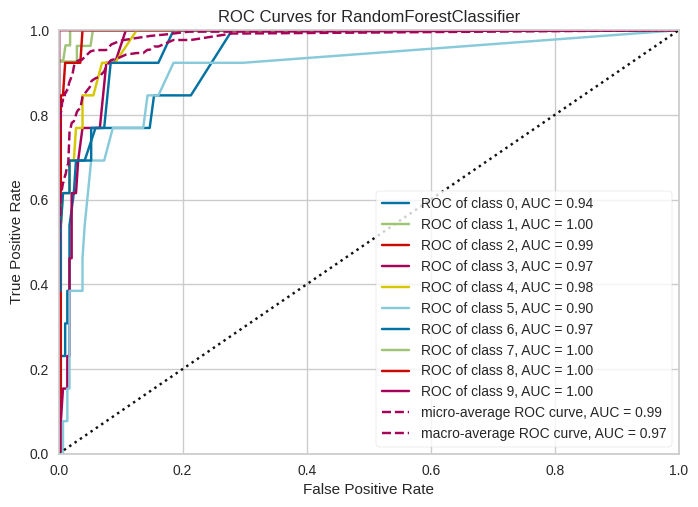

In [154]:
plot_model(model, plot = 'auc')

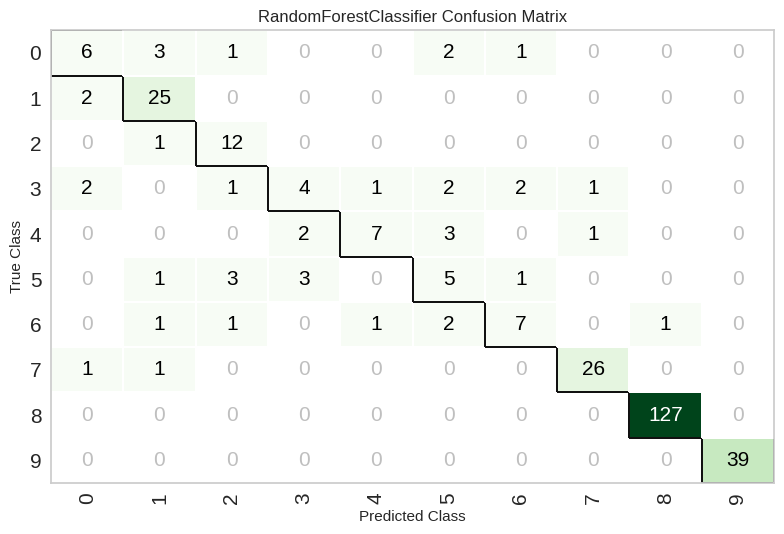

In [155]:
plot_model(model, plot = 'confusion_matrix')

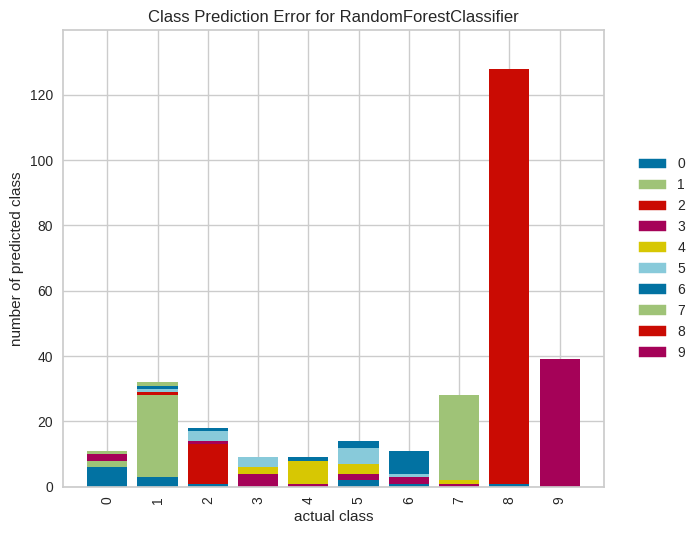

In [156]:
plot_model(model, plot = 'error')

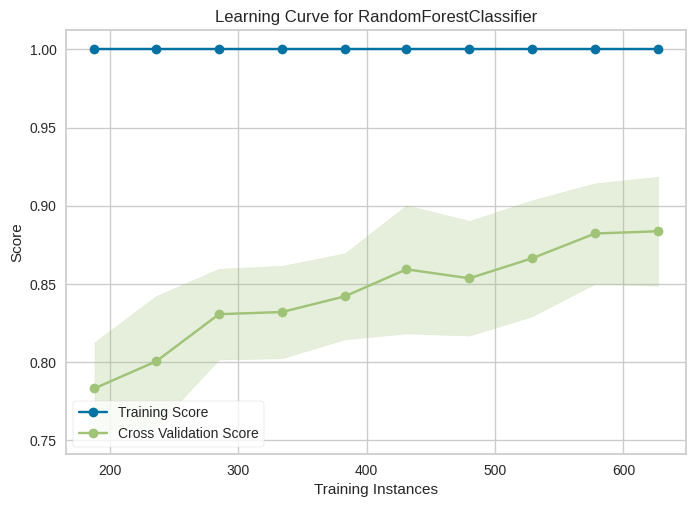

In [157]:
plot_model(model, plot = 'learning')

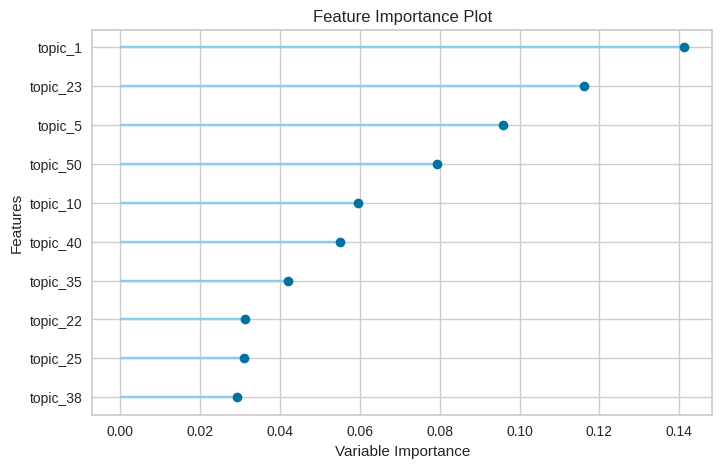

In [158]:
plot_model(model, plot = 'feature')

![](NLP_AutoML.png)